# outage_detection 
## problem statement - we have to help the company predict outage duration .

# Importing our necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import os

# Visualization libraries.
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("C:/Users/LENOVO PC/Desktop/rishabh/phd/data/imp")

# Lets begin with Exploratory Data Analysis

In [4]:
train = pd.read_csv('train_data.csv')
BB = pd.read_csv('broadband_data.csv')
server = pd.read_csv('server_data.csv')
outage = pd.read_csv('outage_data.csv')
rep = pd.read_csv('report_data.csv')
test = pd.read_csv('test_data.csv')
print(train.head())
print(BB.head())
print(server.head())
print(outage.head())
print(rep.head())
print(test.head())

      id area_code  outage_duration
0  13366  area_415                1
1   6783  area_474                0
2   9519  area_931                1
3  10202  area_700                1
4   4555  area_600                2
     id    broadband_type
0  6597  broadband_type_8
1  8011  broadband_type_8
2  2597  broadband_type_8
3  5022  broadband_type_8
4  6852  broadband_type_8
     id     transit_server_type
0  6597  transit_server_type_11
1  8011  transit_server_type_15
2  2597  transit_server_type_15
3  5022  transit_server_type_15
4  5022  transit_server_type_11
     id    outage_type
0  6597  outage_type_2
1  8011  outage_type_2
2  2597  outage_type_2
3  5022  outage_type_1
4  6852  outage_type_1
     id      log_report_type  volume
0  6597   log_report_type_68       6
1  8011   log_report_type_68       7
2  2597   log_report_type_68       1
3  5022  log_report_type_172       2
4  5022   log_report_type_56       1
      id area_code
0   3340  area_344
1  14067  area_933
2   1134   area_16


## Merging the Dataframes 

In [5]:
#training dataset prep
temp = pd.merge(train,BB,on='id',how='left')
temp1 = pd.merge(temp,server,on='id',how='left')
temp2 = pd.merge(temp1,outage,on='id',how='left')
train_df = pd.merge(temp2,rep,on='id',how='left')
train_df.head(10)

,id,area_code,outage_duration,broadband_type,transit_server_type,outage_type,log_report_type,volume
0,13366,area_415,1,broadband_type_2,transit_server_type_35,outage_type_4,log_report_type_312,1
1,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_312,2
2,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_233,1
3,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_232,1
4,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_315,2
5,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_235,1
6,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_313,2
7,6783,area_474,0,broadband_type_2,transit_server_type_34,outage_type_2,log_report_type_312,2
8,6783,area_474,0,broadband_type_2,transit_server_type_34,outage_type_2,log_report_type_233,1
9,6783,area_474,0,broadband_type_2,transit_server_type_34,outage_type_2,log_report_type_232,1


In [7]:
print("Total number of rows: " + str(len(train_df.index)))
print("Number of  na values:")
for column in train_df.columns:
    print(" * " + column + ": " + str(train_df[column].isnull().sum()))

Total number of rows: 48973
Number of  na values:
 * id: 0
 * area_code: 0
 * outage_duration: 0
 * broadband_type: 0
 * transit_server_type: 0
 * outage_type: 0
 * log_report_type: 0
 * volume: 0


In [8]:
train_df.shape

(48973, 8)

In [9]:
train_df.describe()

,id,outage_duration,volume
count,48973.000000,48973.000000,48973.000000
mean,9141.189084,0.539889,8.605742
std,5390.273600,0.725738,23.487812
min,1.000000,0.000000,1.000000
25%,4493.000000,0.000000,1.000000
50%,9107.000000,0.000000,2.000000
75%,13663.000000,1.000000,6.000000
max,18550.000000,2.000000,877.000000


In [10]:
train_df.nunique()

id                     5904
area_code               876
outage_duration           3
broadband_type           10
transit_server_type      49
outage_type               5
log_report_type         310
volume                  240
dtype: int64

In [11]:
train_dfdp = train_df[train_df.duplicated()]
train_dfdp.head()

,id,area_code,outage_duration,broadband_type,transit_server_type,outage_type,log_report_type,volume


## no duplicate vaues found. 

In [12]:
train_df.dtypes

id                      int64
area_code              object
outage_duration         int64
broadband_type         object
transit_server_type    object
outage_type            object
log_report_type        object
volume                  int64
dtype: object

In [13]:
#test dataset prep
temp = pd.merge(test,BB,on='id',how='left')
temp1 = pd.merge(temp,server,on='id',how='left')
temp2 = pd.merge(temp1,outage,on='id',how='left')
test_df = pd.merge(temp2,rep,on='id',how='left')
test_df.head()

,id,area_code,broadband_type,transit_server_type,outage_type,log_report_type,volume
0,3340,area_344,broadband_type_2,transit_server_type_35,outage_type_4,log_report_type_312,2
1,14067,area_933,broadband_type_2,transit_server_type_20,outage_type_1,log_report_type_134,1
2,1134,area_16,broadband_type_8,transit_server_type_11,outage_type_1,log_report_type_155,10
3,1134,area_16,broadband_type_8,transit_server_type_11,outage_type_1,log_report_type_170,6
4,27,area_793,broadband_type_8,transit_server_type_11,outage_type_1,log_report_type_73,3


In [14]:
test_df.isna().sum()

id                     0
area_code              0
broadband_type         0
transit_server_type    0
outage_type            0
log_report_type        0
volume                 0
dtype: int64

In [15]:
test_df.dtypes

id                      int64
area_code              object
broadband_type         object
transit_server_type    object
outage_type            object
log_report_type        object
volume                  int64
dtype: object

In [16]:
test_dfdp = test_df[test_df.duplicated()]
test_dfdp.head(5)

,id,area_code,broadband_type,transit_server_type,outage_type,log_report_type,volume


In [18]:
test_df.drop_duplicates(subset = "id", inplace = True)

In [19]:
test_df.shape

(1477, 7)

## label encoding to convert datatype 

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
train_df['broadband_type']= label_encoder.fit_transform(train_df['broadband_type']) 
train_df['area_code']= label_encoder.fit_transform(train_df['area_code']) 
train_df['transit_server_type']= label_encoder.fit_transform(train_df['transit_server_type']) 
train_df['outage_type']= label_encoder.fit_transform(train_df['outage_type']) 
train_df['log_report_type']= label_encoder.fit_transform(train_df['log_report_type']) 

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
test_df['broadband_type']= label_encoder.fit_transform(test_df['broadband_type']) 
test_df['area_code']= label_encoder.fit_transform(test_df['area_code']) 
test_df['transit_server_type']= label_encoder.fit_transform(test_df['transit_server_type']) 
test_df['outage_type']= label_encoder.fit_transform(test_df['outage_type']) 
test_df['log_report_type']= label_encoder.fit_transform(test_df['log_report_type']) 

In [22]:
train_df.dtypes

id                     int64
area_code              int64
outage_duration        int64
broadband_type         int64
transit_server_type    int64
outage_type            int64
log_report_type        int64
volume                 int64
dtype: object

In [23]:
test1 = test_df['id']

# Visualization 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208517D5F98>,
      dtype=object)

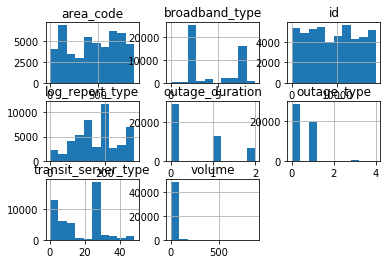

In [25]:
train_df.hist()

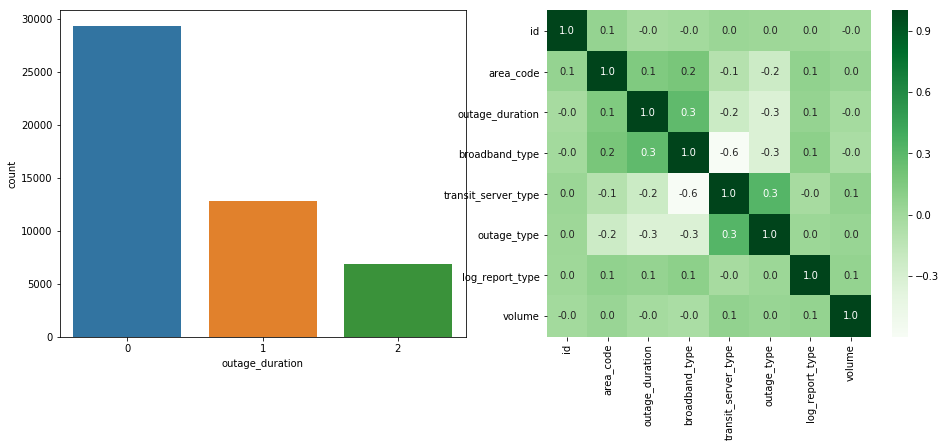

In [27]:
## plot below shows the value count of our three target classes and correlation map of our numeric features. 
f, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x = train_df['outage_duration'], ax=axes[0])
sns.heatmap(train_df.corr(), annot = True, cmap = "Greens", fmt = ".1f", ax=axes[1])

## above correlation map shows us there is some correlation between broadband type and outage duration also between transit server type and outage type .

## below graph showes us relation between broadband type and outage duration . It could be inferred from the graph that broadband type 2 and 8 have more outages followed by broadband type 7,6,4. 

Text(0.5,0,'broadband type')

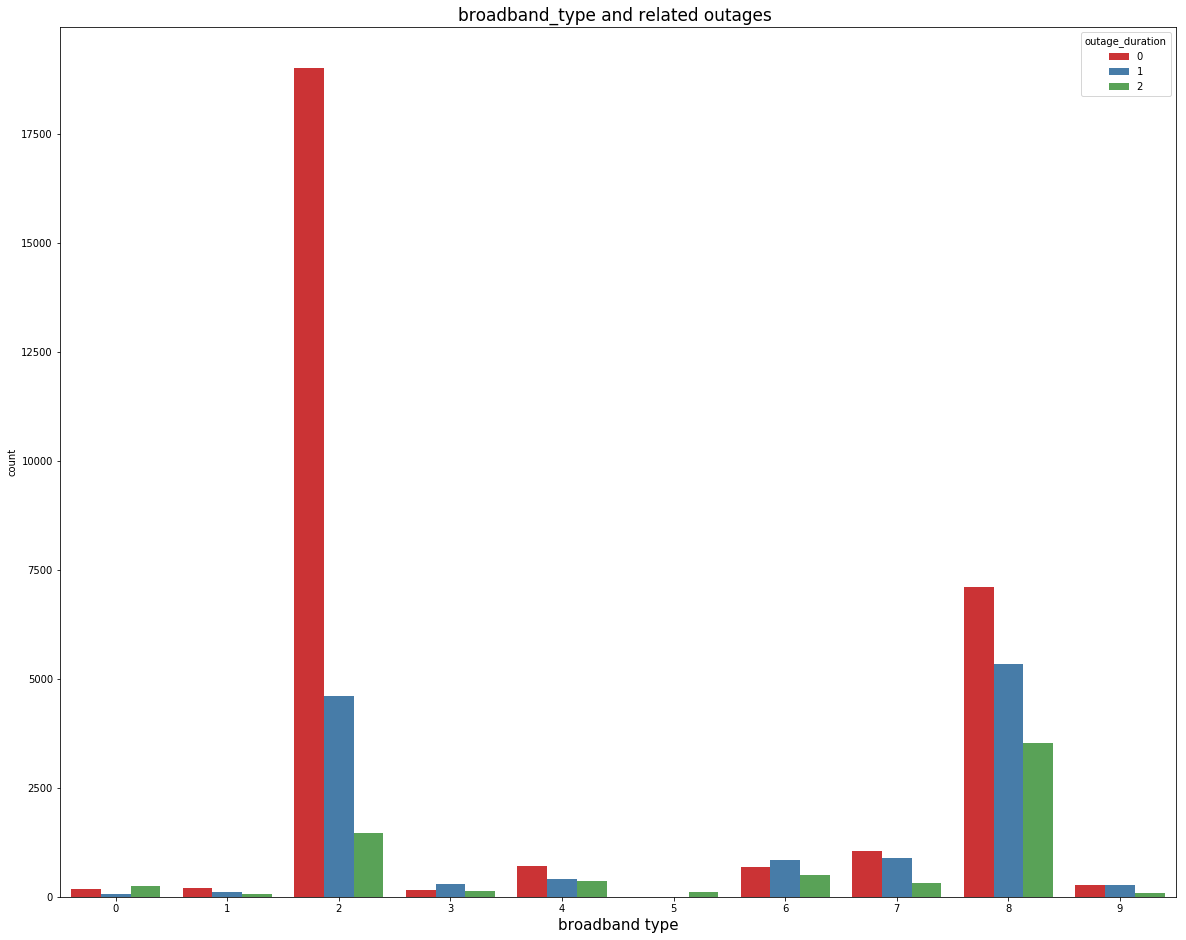

In [28]:
plt.figure(figsize=(20,16))
sns.countplot(x='broadband_type',hue='outage_duration',data=train_df, palette='Set1')
plt.title("broadband_type and related outages " , fontsize=17)
plt.xlabel("broadband type", fontsize=15)

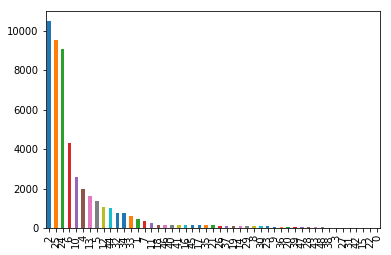

In [29]:
train_df["transit_server_type"].value_counts().plot(kind="bar")

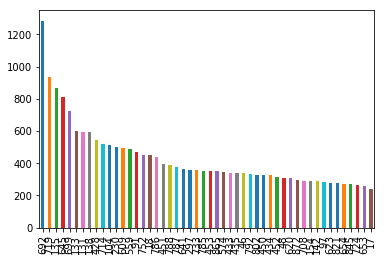

In [30]:
train_df["area_code"].value_counts().head(50).plot(kind="bar")

## following graph below gives us an idea that transit servers 11,13,20 have more outage type 1  whereas in servers - 34,35 there is more outage type 2 


Text(0.5,0,'transit server type')

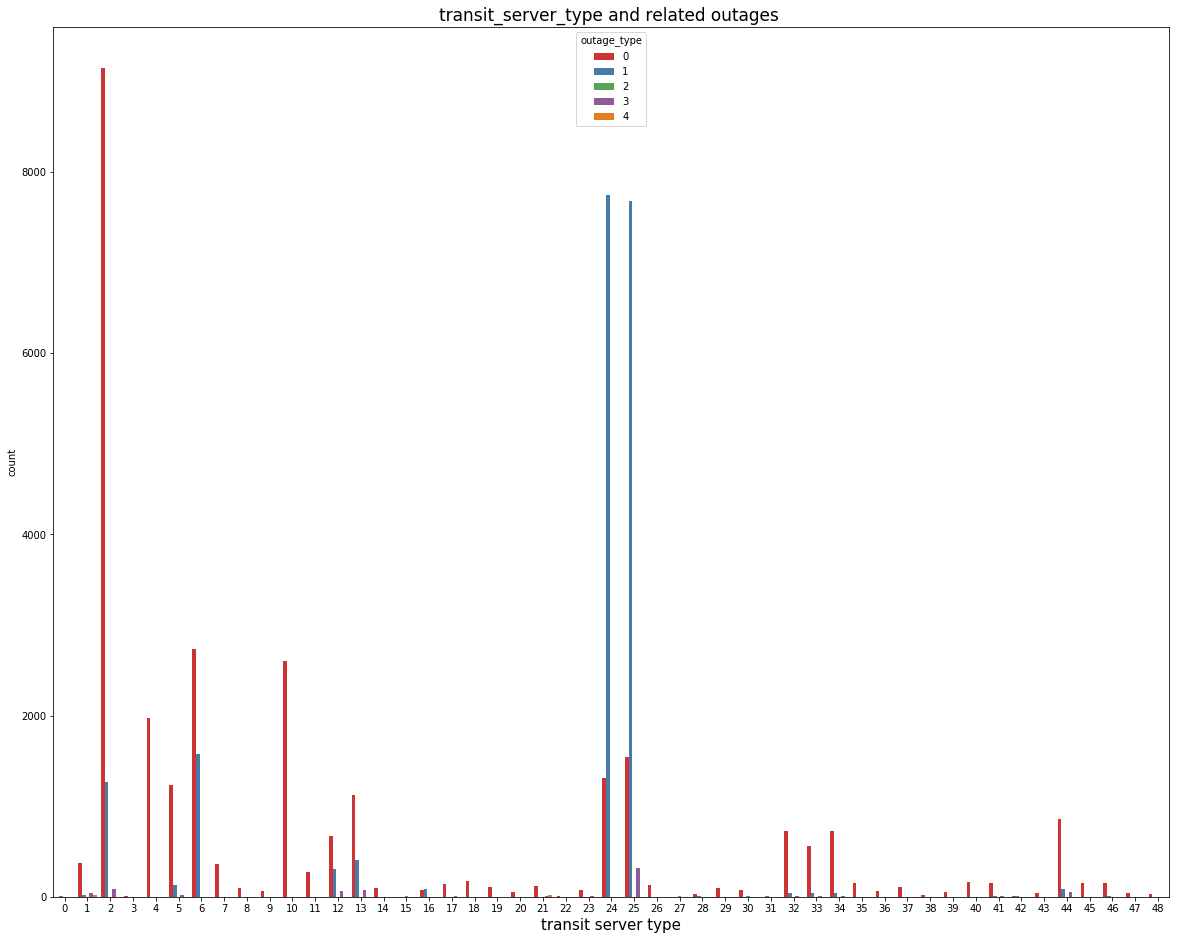

In [31]:
plt.figure(figsize=(20,16))
sns.countplot(x='transit_server_type',hue='outage_type',data=train_df, palette='Set1')
plt.title("transit_server_type and related outages " , fontsize=17)
plt.xlabel("transit server type", fontsize=15)

## below graph gives us an idea where transit server types 11,15,20,34,35 are predominant in outage duration 0.
## server types 11,13,15,20,24,54 are predominant in  outage duration 1.
## server types 11,13,15,42,43,44 are predominant in outage duration 2. 

Text(0.5,0,'transit server type')

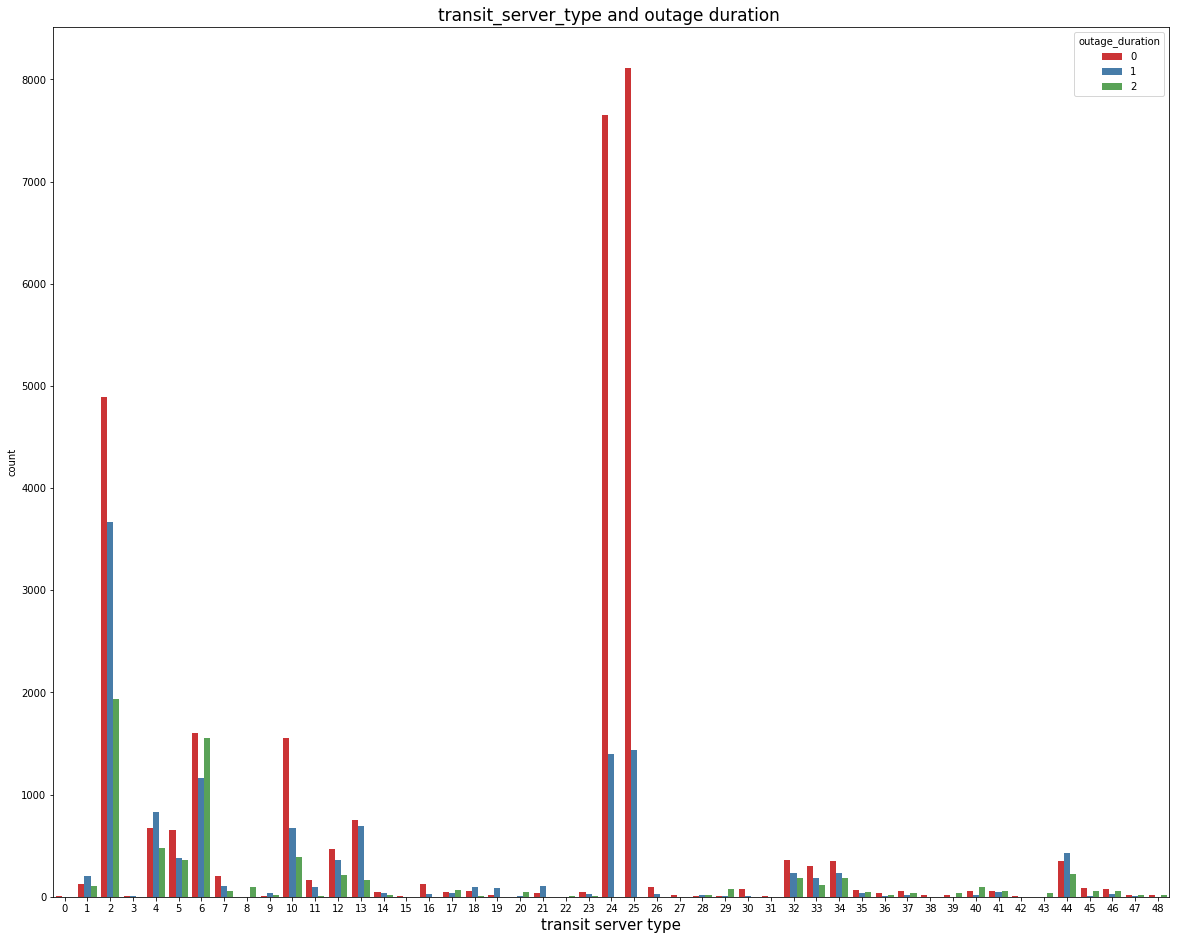

In [33]:
plt.figure(figsize=(20,16))
sns.countplot(x='transit_server_type',hue='outage_duration',data = train_df, palette='Set1')
plt.title("transit_server_type and outage duration " , fontsize=17)
plt.xlabel("transit server type", fontsize=15)

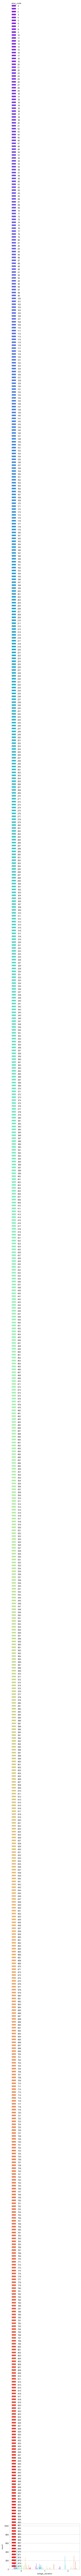

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='outage_duration',hue='area_code',data=train_df,palette='rainbow')

## answers to the questions asked by team through eda - 
## 1.- areas which are more prone to longer outage duration are area where broadband type 8, 2 which are of  type ADSL along with it where there are transit server types 11,13,15 which are predominant in both outage types which are 1 and 2 .

## 2- broadband band types which are prone to long outage duration are broadband types 2,8,6,7 in which server types 2,8,6 belong to ADSL TYPE family.  

## 3- more outages can be detected by grouping the areas on their broadband and server types also we can see the device the user is using if it is faulty or is not compatible that maybe a reason for outage . Also as we got to know from eda we can simply look  at the broadband type if it is from ADSL type . 

## seperating our dependant and independant variable


In [35]:
X = train_df.drop('outage_duration',axis=1)
y= train_df['outage_duration']

## train test split 

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

## Model Building 

In [37]:
from sklearn.model_selection import GridSearchCV

def model_building(X, y, test, model, params = None, k = 1) :
    
    if params == None :
        model.fit(X, y)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X), model.predict(test))
    
    else :
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        model_cv.fit(X, y)
        model = model_cv
        
        
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))

In [38]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score

def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, pred_train))
    print("f1_score: ",f1_score(y_train,pred_train, average= "macro")) 
    print('\nConfusion Matrix :')
    print(confusion_matrix(y_test, pred_test) ) 
    print('\nAccuracy Score :', accuracy_score(y_test, pred_test)) 
    
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================''')
    print(classification_report(y_test, pred_test))
    print("f1_score: ",f1_score(y_test,pred_test, average = "macro" ))
    print('\nConfusion Matrix :')
    print(confusion_matrix(y_test, pred_test) ) 
    print('\nAccuracy Score :', accuracy_score(y_test, pred_test)) 

In [39]:
from sklearn.linear_model import LogisticRegression

model, pred_train, pred_test = model_building(X_train, y_train, X_test, LogisticRegression())

In [40]:

model_evaluation(y_train, pred_train, y_test, pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
             precision    recall  f1-score   support

          0       0.63      0.90      0.74     20537
          1       0.39      0.21      0.27      8982
          2       0.25      0.00      0.00      4762

avg / total       0.51      0.59      0.51     34281

f1_score:  0.33735061242750713

Confusion Matrix :
[[7974  827    9]
 [3059  767    4]
 [1673  376    3]]

Accuracy Score : 0.5951538252109991

               CLASSIFICATION REPORT FOR TEST DATA
             precision    recall  f1-score   support

          0       0.63      0.91      0.74      8810
          1       0.39      0.20      0.26      3830
          2       0.19      0.00      0.00      2052

avg / total       0.50      0.60      0.51     14692

f1_score:  0.33619998398707396

Confusion Matrix :
[[7974  827    9]
 [3059  767    4]
 [1673  376    3]]

Accuracy Score : 0.5951538252109991


In [41]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

estimators = [BaggingClassifier(random_state=123),
              AdaBoostClassifier(random_state=123), 
              RandomForestClassifier(random_state=123), 
              GradientBoostingClassifier(random_state=123)]

for estimator in estimators :

    model, pred_train, pred_test = model_building(X_train, y_train,
                                                  X_test, estimator)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    model_evaluation(y_train, pred_train, y_test, pred_test)

C:\Users\LENOVO PC\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


			 BaggingClassifier 


               CLASSIFICATION REPORT FOR TRAIN DATA
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     20537
          1       1.00      0.99      1.00      8982
          2       1.00      0.99      1.00      4762

avg / total       1.00      1.00      1.00     34281

f1_score:  0.9968750041814438

Confusion Matrix :
[[8514  205   91]
 [ 291 3484   55]
 [ 143   92 1817]]

Accuracy Score : 0.9403076504219984

               CLASSIFICATION REPORT FOR TEST DATA
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      8810
          1       0.92      0.91      0.92      3830
          2       0.93      0.89      0.91      2052

avg / total       0.94      0.94      0.94     14692

f1_score:  0.9265048783296264

Confusion Matrix :
[[8514  205   91]
 [ 291 3484   55]
 [ 143   92 1817]]

Accuracy Score : 0.9403076504219984
			 AdaBoostClassifier 


               CLASSIFICA

## Predicting on Test Result

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
output = model.predict(test_df)
output

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [44]:
output = pd.DataFrame({
        "id": test1,
        "outage_duration": output
    })

output.to_csv('submi5.csv', index=False)

In [45]:
output

,id,outage_duration
0,3340,0
1,14067,0
2,1134,0
4,27,1
6,9793,0
10,12010,0
14,7213,0
16,16347,0
17,8811,0
18,17705,0


In [46]:
output[['id','outage_duration']].to_csv(r'C:\Users\LENOVO PC\Desktop\aman\submi5.csv',index=False)